In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import scipy
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #remove warning

In [2]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [3]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return(XTrain,XTest,yTrain,yTest)

In [4]:
def saveAs(fileName, df):
    np.savetxt(fileName, df, delimiter=',')

In [5]:
def prediction_accuracy(yActual, yPred):
    return np.sqrt(metrics.mean_squared_error(yActual, yPred))

In [6]:
from sklearn.preprocessing import StandardScaler
def standardize(df):
    scaler=StandardScaler()
    df_std=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    df_std[df.columns[-1]]=df[df.columns[-1]]
    return df_std

In [7]:
#part1

path = "./atmosphere_data.csv"
df1 = load_dataset(path)
df = standardize(df1)
Class = df.columns[-1]

XTrain,XTest,yTrain,yTest = train_test(df)

train = pd.concat([XTrain,yTrain], axis=1)
test = pd.concat([XTrain,yTrain], axis=1)

saveAs('./atmosphere-train.csv', train)
saveAs('./atmosphere-test.csv', train)

In [8]:
#part2
def straight_line_regression(df, wrt_, to_be_predicted):
    X = df[wrt_].values.reshape(-1,1)
    y = df[to_be_predicted].values.reshape(-1,1)

    XTrain,XTest,yTrain,yTest = train_test_split(X, y, test_size=0.3, random_state=42)

    regressor = LinearRegression()  
    regressor.fit(XTrain, yTrain)

    #print(regressor.intercept_)
    #print(regressor.coef_)  #For retrieving the slope:

    yPred = regressor.predict(XTest)
    yTrainPred = regressor.predict(XTrain)

    #data = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPred.flatten()})
    
    plt.scatter(XTest, yTest,  color='gray')
    plt.xlabel(wrt_)
    plt.ylabel(to_be_predicted)
    plt.plot(XTest, yPred, color='blue', linewidth=2)
    plt.show()
    
    print('Root Mean Squared Error on Test Data:', prediction_accuracy(yTest, yPred))
    print('Root Mean Squared Error on Train Data:', prediction_accuracy(yTrain, yTrainPred))
    
    plt.scatter(yPred, yTest)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title("Test Data")
    #plt.ylim([5.5,6.5])
    plt.show()
    
    plt.scatter(yTrainPred, yTrain)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title("Train Data")
    plt.show()

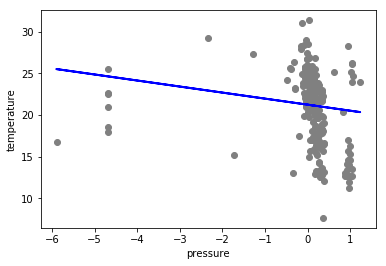

Root Mean Squared Error on Test Data: 4.286985483129509
Root Mean Squared Error on Train Data: 4.279790433682601


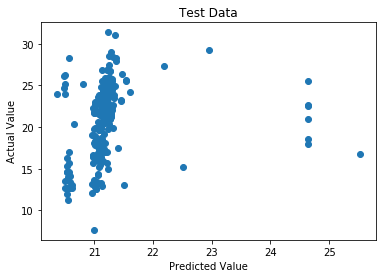

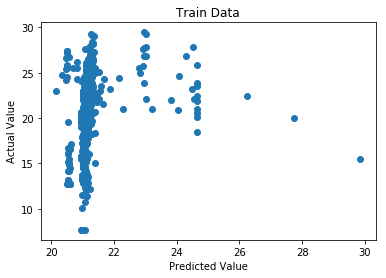

In [9]:
straight_line_regression(df, 'pressure', 'temperature')

In [17]:
#part3
def polynomial_curve_fitting(df, wrt_, to_be_predicted_, for_datatype_):
    RMSEs = []
    degrees = [2,3,4,5]
    for d in degrees:
        X = df[wrt_].values.reshape(-1,1)
        y = df[to_be_predicted_].values.reshape(-1,1)

        XTrain,XTest,yTrain,yTest = train_test_split(X, y, test_size=0.3, random_state=42)
        
        if(for_datatype_ =='train'):
            XT = XTrain
            yT = yTrain
        else:
            XT = XTest
            yT = yTest
            
        poly = PolynomialFeatures(degree = d) 
        X_poly = poly.fit_transform(XT)
        poly.fit(X_poly, yT)

        model = LinearRegression()
        model.fit(X_poly, yT)
        y_poly_pred = model.predict(X_poly)

        rmse = np.sqrt(metrics.mean_squared_error(yT,y_poly_pred))
        RMSEs.append(rmse)
    
        print("Degree = ", d)
        X_new = [float(x) for x, _ in sorted(zip(XT, y_poly_pred))]
        Y_new = [float(y) for _, y in sorted(zip(XT, y_poly_pred))]

        plt.scatter(XT, yT,  color='gray')
        #plt.title(d)
        plt.xlabel(wrt_)
        plt.ylabel(to_be_predicted_)
        plt.plot(X_new, Y_new, color='red')
        plt.show()
    
    plt.bar(degrees, RMSEs)
    plt.xlabel("Degree of polynomial")
    plt.ylabel("RMSE")
    plt.show()
    
    plt.scatter(y_poly_pred, yT)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title("Train Data")
    plt.show()

Degree =  2


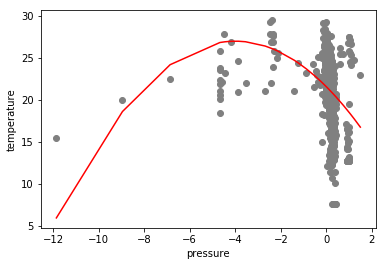

Degree =  3


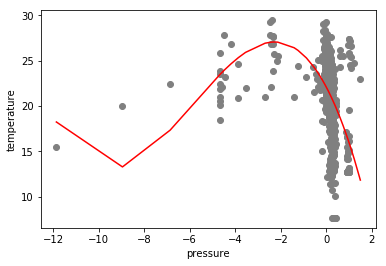

Degree =  4


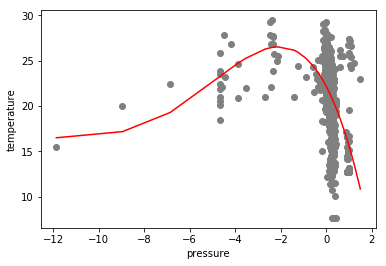

Degree =  5


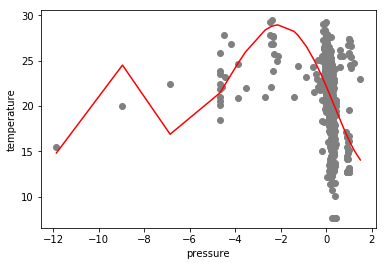

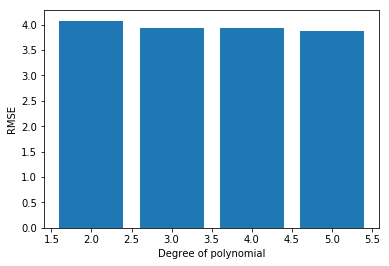

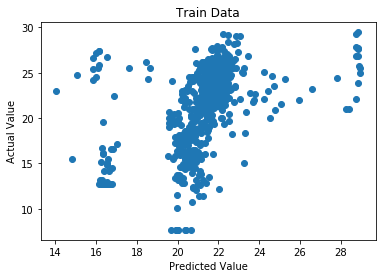

In [18]:
polynomial_curve_fitting(df, 'pressure', 'temperature', 'train')

Degree =  2


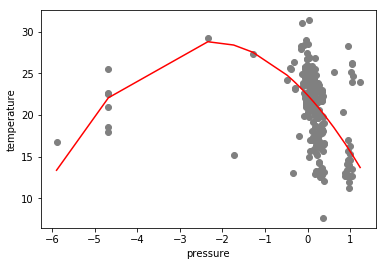

Degree =  3


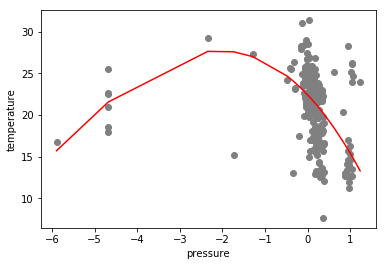

Degree =  4


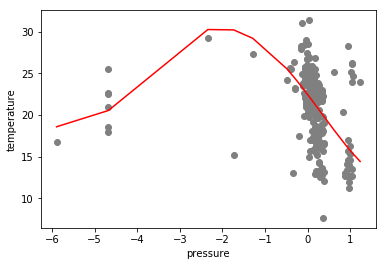

Degree =  5


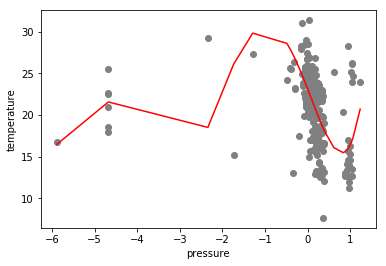

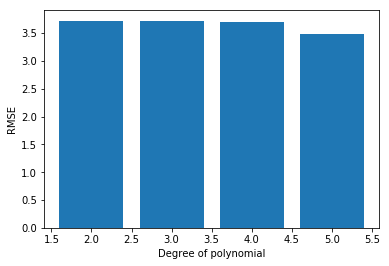

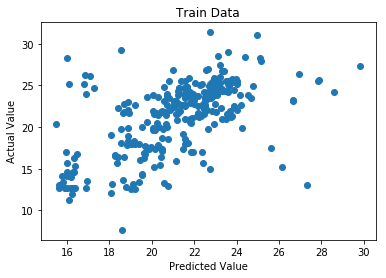

In [19]:
polynomial_curve_fitting(df, 'pressure', 'temperature', 'test')

In [25]:
CORRs=[]
for i in range(len(df.columns)-1):
    corr = np.corrcoef(df[df.columns[i]], df[Class])[0,1]
    CORRs.append(corr)
    print(df.columns[i], " vs. ", Class, ": ", corr)

humidity  vs.  temperature :  0.40156984787426697
pressure  vs.  temperature :  -0.18138907534657855
rain  vs.  temperature :  -0.10889328204366618
lightAvg  vs.  temperature :  -0.1813999634790357
lightMax  vs.  temperature :  -0.14588351410678832
moisture  vs.  temperature :  0.08066019795562442


In [26]:
selected = ['lightAvg', 'humidity', 'temperature']

In [53]:
path = "./atmosphere_data.csv"
df1 = load_dataset(path)
df= df1[selected]
Class = df.columns[-1]

In [54]:
XTrain,XTest,yTrain,yTest = train_test(df)

regressor = LinearRegression()
regressor.fit(XTrain, yTrain)

#print(regressor.intercept_)
#print(regressor.coef_)  #For retrieving the slope:

yPred = regressor.predict(XTest)
yTrainPred = regressor.predict(XTrain)

In [55]:
print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(yTest, yPred)))
print('Root Mean Squared Error on Train Data:', np.sqrt(metrics.mean_squared_error(yTrain, yTrainPred)))

Root Mean Squared Error on Test Data: 3.9062548482564843
Root Mean Squared Error on Train Data: 4.000232317624322


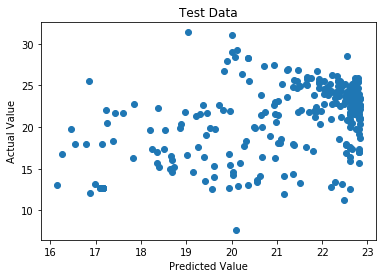

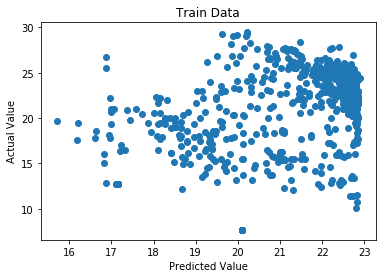

In [56]:
plt.scatter(yPred, yTest)

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Test Data")
#plt.ylim([5.5,6.5])
plt.show()
plt.scatter(yTrainPred, yTrain)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Train Data")
plt.show()

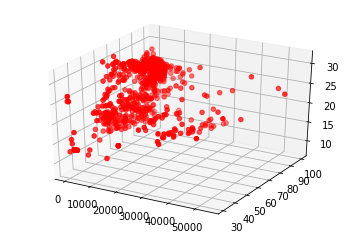

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[selected[0]], df[selected[1]], df[selected[2]], c='r', marker='o')

x = XTrain['lightAvg']
y = XTrain['humidity']

X, Y = np.meshgrid(x, y)

zs = yTrainPred

#Z = zs.reshape(X.shape)
#ax.scatter(x,y,zs)
#ax.plot_surface(X, Y, Z)
#plot_trisurf(X,Y,zs)
#ax.set_xlabel(selected[0])
#ax.set_ylabel(selected[1])
#ax.set_zlabel(selected[2])


plt.show()

In [72]:
path = "./atmosphere_data.csv"
df1 = load_dataset(path)
df= df1[selected]
Class = df.columns[-1]

2 3.447404380908329


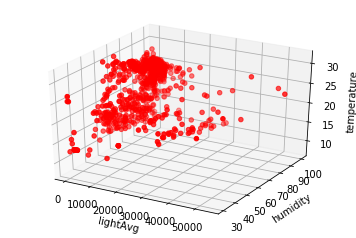

3 2.973336617266721


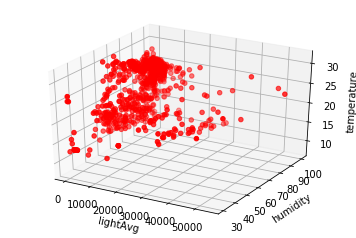

4 2.6662739473255073


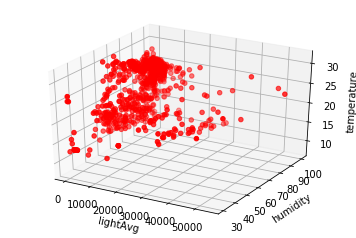

KeyboardInterrupt: 

In [86]:
RMSEs = []
degrees = [2,3,4,5]
for d in degrees:
    poly = PolynomialFeatures(degree = d) 
    X_poly_train = poly.fit_transform(XTrain)
    poly.fit(X_poly_train, yTrain)

    model = LinearRegression()
    model.fit(X_poly_train, yTrain)
    y_poly_pred = model.predict(X_poly_train)

    rmse = np.sqrt(metrics.mean_squared_error(yTrain,y_poly_pred))
    print(d, rmse)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df[selected[0]], df[selected[1]], df[selected[2]], c='r', marker='o')

    ax.set_xlabel(selected[0])
    ax.set_ylabel(selected[1])
    ax.set_zlabel(selected[2])

    plt.show()
    """
    print("Degree = ", d)
    plt.scatter(XTrain, yTrain,  color='gray')
    #plt.title(d)
    plt.xlabel("pH Value")
    plt.ylabel("quality")
    plt.scatter(XTrain, y_poly_pred, color='red')
    plt.show()
    
plt.plot(degrees, RMSEs)
plt.xlabel("Degree of polynomial")
plt.ylabel("RMSE")
plt.show()"""